# Tutorial on using simpleSVGD

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import simpleSVGD

We define our test function here. The actual scalar value of the function is never used in the optimization process, so it isn't necessary to implement. Change the smoothing factor to be smaller to create strongly isolated modes.

In [2]:
smoothing = 30

def Himmelblau(input_array: np.array) -> np.array:

    # As this is a 2-dimensional function, assert that the passed input_array
    # is correct.
    assert input_array.shape[1] == 2

    # To simplify reading this function, we do this step in between. It is not
    # the most optimal way to program this.
    x = input_array[:, 0, None]
    y = input_array[:, 1, None]

    output_array = (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2

    # As the output should be a scalar function, assert that the
    # output is also length 1 in dim 2 of the array.
    assert output_array.shape == (input_array.shape[0], 1)

    return output_array / smoothing


def Himmelblau_grad(input_array: np.array) -> np.array:

    # As this is a 2-dimensional function, assert that the passed input_array
    # is correct.
    assert input_array.shape[1] == 2

    # To simplify reading this function, we do this step in between. It is not
    # the most optimal way to program this.
    x = input_array[:, 0, None]
    y = input_array[:, 1, None]

    # Compute partial derivatives and combine them
    output_array_dx = 2 * (x ** 2 + y - 11) * (2 * x) + 2 * (x + y ** 2 - 7)
    output_array_dy = 2 * (x ** 2 + y - 11) + 2 * (x + y ** 2 - 7) * (2 * y)
    output_array = np.hstack((output_array_dx, output_array_dy))

    # Check if the output shape is correct
    assert output_array.shape == input_array.shape

    return output_array / smoothing

For the purposes of animation, we will also compute the function on a grid. Note that this is typically very expensive, and against the point of using SVGD. When we use SVGD, we typically are not capable to compute the entire function over the entire input space.

In [3]:
domain = [-6, 6, -6, 6]

x1s = np.linspace(domain[0], domain[1], 100)
x2s = np.linspace(domain[2], domain[3], 100)

grid = np.stack(np.meshgrid(x1s, x2s))

background_image = np.empty_like(grid[0, :, :])

for ix1 in range(100):
    background_image[ix1, :] = Himmelblau(grid[:, ix1, :].T)[:, 0]


background = (x1s, x2s, background_image)

Now we optimize the starting samples using SVGD, and pass the function on evaluated on the grid as a nice background for the animation.

<IPython.core.display.Javascript object>


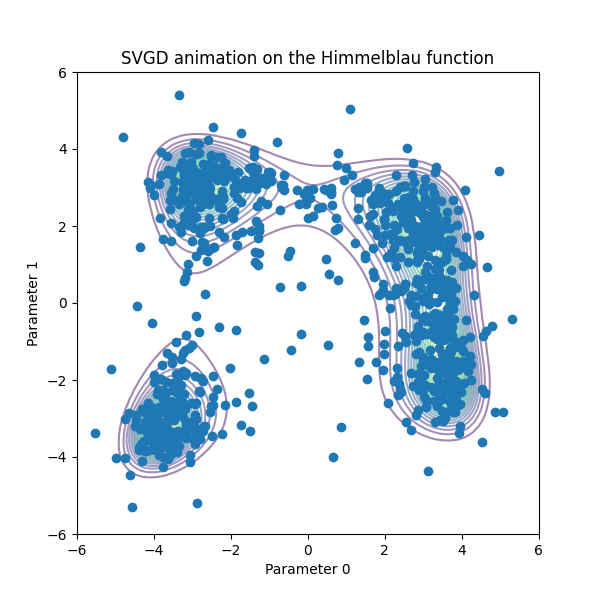

  0%|          | 0/130 [00:00<?, ?it/s]

In [4]:
initial_samples = np.random.normal(0, 3, [1000, 2])

%matplotlib notebook

figure = plt.figure(figsize=(6, 6))
plt.xlabel("Parameter 0")
plt.ylabel("Parameter 1")
plt.title("SVGD animation on the Himmelblau function")

final_samples = simpleSVGD.update(
    initial_samples,
    Himmelblau_grad, 
    n_iter=130,
    # AdaGrad parameters
    stepsize=1e0,
    animate=True,
    background=background,
    figure=figure,
)

Let's compare the initial and final results:

<IPython.core.display.Javascript object>


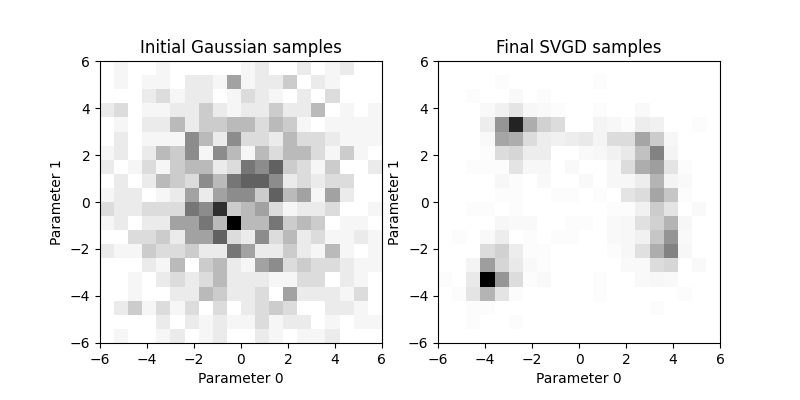

In [5]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
_, bins_0, bins_1, _ = plt.hist2d(
    initial_samples[:, 0],
    initial_samples[:, 1],
    range=[[-6, 6], [-6, 6]],
    bins=20,
    cmap=plt.get_cmap("Greys"),
)
plt.gca().set_aspect(1)
plt.xlabel("Parameter 0")
plt.ylabel("Parameter 1")
plt.title("Initial Gaussian samples")
plt.xlim([-6, 6])
plt.ylim([-6, 6])

plt.subplot(122)
_ = plt.hist2d(
    final_samples[:, 0],
    final_samples[:, 1],
    bins=(bins_0, bins_1),
    range=[[-6, 6], [-6, 6]],
    cmap=plt.get_cmap("Greys"),
)
plt.gca().set_aspect(1)
plt.xlabel("Parameter 0")
plt.ylabel("Parameter 1")
plt.title("Final SVGD samples")
plt.xlim([-6, 6])
plt.ylim([-6, 6])

plt.show()

**Looks wonderful!**